# Лабораторная работа №2. Градиентный бустинг. 

Выполнил: Лабуткин Иван Алексеевич, группа 4144

In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from GBClassifier import GradientBoostingClassifier, count_accuracy, cross_validation
import time

## Подготовка данных

In [2]:
data=pd.read_csv('breast-cancer.csv', sep=',')

In [3]:
data=data.drop(['id'], axis=1)
data[(data[['diagnosis']]=='M')]=1
data[(data[['diagnosis']]=='B')]=-1
y=data[['diagnosis']].to_numpy().reshape(-1).astype(np.int8)
data=data.drop(['diagnosis'], axis=1)
data=data.drop(['radius_mean', 'area_mean', 'radius_mean', 'radius_worst', 'area_worst', 'perimeter_worst'], axis=1)
data=data.drop(['concavity_mean', 'concave points_mean', 'texture_worst'], axis=1)
data=data.drop(['area_se', 'perimeter_se', 'compactness_worst','concave points_worst'], axis=1)
data=data.drop(['smoothness_worst','concavity_worst'], axis=1)
X=data.to_numpy()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=4)

## Эксперименты с реализованным алгоритмом

Посмотрим, как выглядит график обучения:

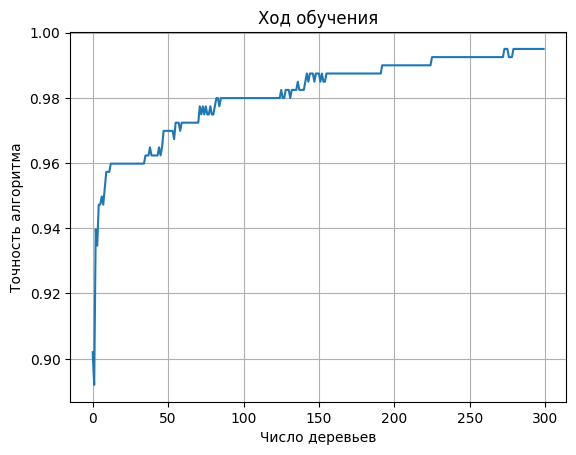

In [5]:
gb=GradientBoostingClassifier(n_trees=300, max_depth=1)
gb.fit(X_train, y_train, return_fit_plot=True)

Измерим точность алгоритма с использованием кросс-валидации

In [8]:
print("Точность написанного вручную алгоритма с использованием кросс-валидации:", cross_validation(gb,X,y,5))

Точность написанного вручную алгоритма с использованием кросс-валидации: 0.9437199192671946


Измерим время обучения и предсказания:

In [9]:
start = time.time()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
end = time.time()
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 309.59486961364746 ms


## Сравнение с эталонной реализацией

In [10]:
from sklearn.ensemble import GradientBoostingClassifier as EtalonClassifier

In [11]:
clf = EtalonClassifier(n_estimators=300, loss='exponential',criterion='squared_error',
    max_depth=1, random_state=0)

In [12]:
print("Точность написанного вручную алгоритма с использованием кросс-валидации:", cross_validation(clf,X,y,5))

Точность написанного вручную алгоритма с использованием кросс-валидации: 0.9437199192671946


In [13]:
start = time.time()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end = time.time()
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 239.12501335144043 ms
